## Import Data

In [3]:
import sys
import os
sys.path.append(os.path.abspath('../app'))

import pandas as pd

from data import Database

In [4]:
db = Database("monsters")
df = db.dataframe()
df.head()

,Name,Type,Level,Rarity,Damage,Health,Energy,Sanity,Timestamp
0,Faerie Dragon,Dragon,4,Rank 3,4d8+3,31.53,33.88,29.55,2024-03-28 14:22:54
1,Hell Hound,Demonic,1,Rank 3,1d8,5.44,10.65,6.87,2024-03-28 14:22:54
2,Kobold Knight,Devilkin,9,Rank 4,9d10,90.11,88.39,90.53,2024-03-28 14:22:54
3,Flame Elemental,Elemental,8,Rank 1,8d4,32.98,32.94,31.27,2024-03-28 14:22:54
4,Wyvern,Dragon,6,Rank 4,6d10,63.24,62.92,61.66,2024-03-28 14:22:54


## Split Data

In [6]:
from sklearn.model_selection import train_test_split

In [5]:
X = df.drop(['Rarity', 'Type', 'Name', 'Damage', 'Timestamp'], axis=1)
y = df['Rarity']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Establish Baseline

In [8]:
from sklearn.dummy import DummyClassifier

In [9]:
dummy_model = DummyClassifier(strategy='most_frequent', random_state=42)
dummy_model.fit(X_train, y_train)
print("Training Accuracy: {:.2f}".format(dummy_model.score(X_train, y_train)))
print("Test Accuracy: {:.2f}".format(dummy_model.score(X_test, y_test)))

Training Accuracy: 0.29
Test Accuracy: 0.32


## Model 1: Random Forest

In [10]:
from sklearn.ensemble import RandomForestClassifier

In [11]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
print("Training Accuracy: {:.2f}".format(rf_model.score(X_train, y_train)))
print("Test Accuracy: {:.2f}".format(rf_model.score(X_test, y_test)))

Training Accuracy: 1.00
Test Accuracy: 0.95


### Tuning Random Forest

In [12]:
from sklearn.model_selection import RandomizedSearchCV

rf_param_grid = {
    'n_estimators': range(25, 125, 5),
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': range(5, 40, 5),
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

rf_model_random = RandomizedSearchCV(
    rf_model, 
    param_distributions=rf_param_grid,
    n_iter=10,
    cv=None,
    verbose=1,
    random_state=42,
    n_jobs=-1)

rf_model_random.fit(X_train, y_train)

print(rf_model_random.best_params_)
print("Test Accuracy: {:.2f}".format(rf_model_random.best_score_))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'n_estimators': 85, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 30, 'bootstrap': True}
Test Accuracy: 0.94


## Model 2: Gradient Boosting

In [13]:
from sklearn.ensemble import GradientBoostingClassifier

In [14]:
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)
print("Training Accuracy: {:.2f}".format(gb_model.score(X_train, y_train)))
print("Test Accuracy: {:.2f}".format(gb_model.score(X_test, y_test)))

Training Accuracy: 1.00
Test Accuracy: 0.92


### Tuning Gradient Boosting

In [15]:
gb_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 3],
    'max_features': [None, 'sqrt', 'log2'],
    'subsample': [0.6, 0.8, 1.0]
}

gb_model_random = RandomizedSearchCV(
    gb_model, 
    param_distributions=gb_param_grid,
    n_iter=10,
    cv=None,
    verbose=1,
    random_state=42,
    n_jobs=-1)

gb_model_random.fit(X_train, y_train)

print(gb_model_random.best_params_)
print("Test Accuracy: {:.2f}".format(gb_model_random.best_score_))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'subsample': 0.8, 'n_estimators': 200, 'min_samples_split': 6, 'min_samples_leaf': 3, 'max_features': None, 'max_depth': 7, 'learning_rate': 0.1}
Test Accuracy: 0.94


## Model 3: Logistic Regression

In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
lr_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)
print("Training Accuracy: {:.2f}".format(lr_model.score(X_train, y_train)))
print("Test Accuracy: {:.2f}".format(lr_model.score(X_test, y_test)))

Training Accuracy: 0.98
Test Accuracy: 0.96


### Tuning Logistic Regression

In [18]:
import numpy as np

lr_param_grid = {
    'C': np.logspace(-4, 4, 20),
    'penalty': ['l1', 'l2'],
}

lr_model_random = RandomizedSearchCV(
    lr_model, 
    param_distributions=lr_param_grid,
    n_iter=10,
    cv=None,
    verbose=1,
    random_state=42,
    n_jobs=-1)

lr_model_random.fit(X_train, y_train)

print(lr_model_random.best_params_)
print("Test Accuracy: {:.2f}".format(lr_model_random.best_score_))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'penalty': 'l2', 'C': 29.763514416313132}
Test Accuracy: 0.99


/home/anthony/Clones/pyenv/versions/Bandersnatch/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/anthony/Clones/pyenv/versions/Bandersnatch/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-le

## Best Model Evaluation: Logistic Regression

Accuracy: 0.98


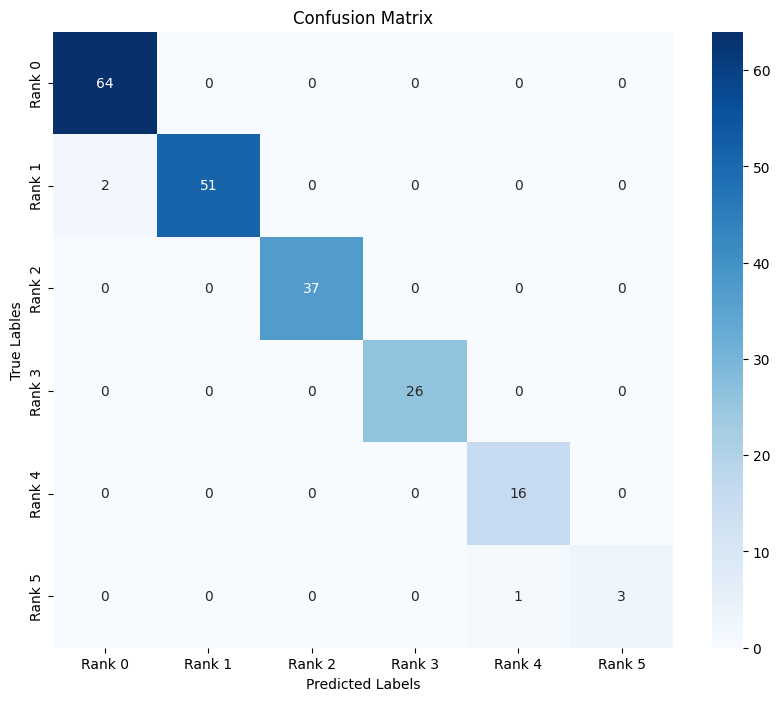

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix

best_model = lr_model_random.best_estimator_
pred = best_model.predict(X_test)

cm = confusion_matrix(y_test, pred)
class_labels = best_model.classes_
cm_df = pd.DataFrame(cm, index=class_labels, columns=class_labels)

plt.figure(figsize=(10, 8))
sns.heatmap(cm_df, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Lables')


print("Accuracy: {:.2f}".format(accuracy_score(y_test, pred)))
plt.show()

In [20]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

      Rank 0       0.97      1.00      0.98        64
      Rank 1       1.00      0.96      0.98        53
      Rank 2       1.00      1.00      1.00        37
      Rank 3       1.00      1.00      1.00        26
      Rank 4       0.94      1.00      0.97        16
      Rank 5       1.00      0.75      0.86         4

    accuracy                           0.98       200
   macro avg       0.99      0.95      0.97       200
weighted avg       0.99      0.98      0.98       200



## Import Model for App Use

In [21]:
import joblib

joblib.dump(best_model, '../app/models/best_model_noclassfeature.joblib')

['../app/models/best_model_noclassfeature.joblib']